<a href="https://colab.research.google.com/github/Divya-Gajjar/Colab_repository/blob/master/NYC_ResidentType_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Classification problem to identify the Resident type of Newyork Income Tax payers.**

Newyork Income Tax Return dataset has both catagorical and numeric features. Resident Type have three classes Full-Year Resident, Full Year Non-resident, Part-Year Non-resident.

This dataset have the prefect fitted decision tree and random forest with all the data features so the important thing is to reduce the variables and get the accuracy and recall arround to perfeect fitted score.







         

Importing the Inbuild libaries of machine learning


In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import yellowbrick

Read the data into the variable df

In [0]:
df = pd.read_csv("/content/NYC Income return.csv")

## This how the multiclass of the Resident type is distributed into the dataset.

Text(0.5, 1.0, 'Class\n(0 :Full year resident||1: Full year non residenr||2:part year non resident)')

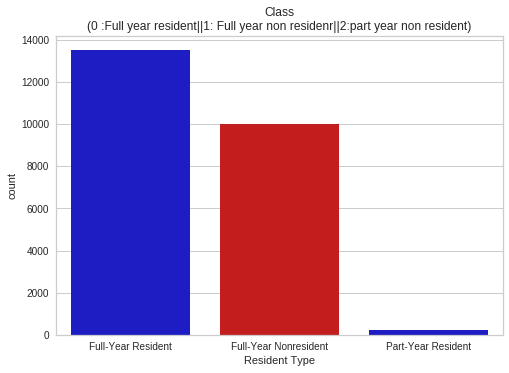

In [125]:
sn.countplot('Resident Type',data = df,palette=colors,)
plt.title("Class\n(0 :Full year resident||1: Full year non residenr||2:part year non resident)")

## This plot is showing which resident type have the highest count in particular year. 

Full year Resident have the highest count during 1999 to 2010.
full year Nonresident have the highest count during the 2011 to 2014.
Wehre Part year resident have the minimal activities during 1999 to 2014 compare to other two.

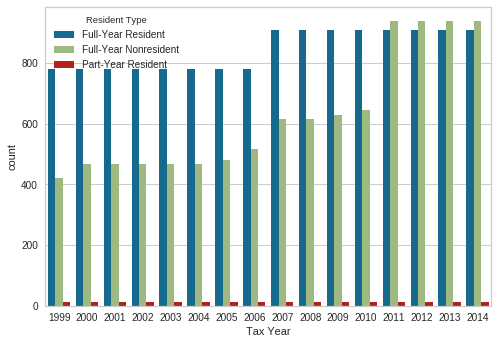

In [126]:
sn.countplot('Tax Year',data=df,hue='Resident Type',)

## **Preprocessing** **function**
Preprocessing function to remove all the missing values and not important features from data set.

The scikit-learn uses only numerical features and these features are interpreted always as continuous numeric variables, so have to convert the catagorical features into numeric variables using label encoding.

In [127]:
def preprocessing():
  global df
  print('\nBefore droping missing values\n',df.isnull().sum())
  df = df.drop("Disclosure", axis=1)
  df = df.dropna()
  print('\nAfter droping missing values\n',df.isnull().sum())

  print('\nBefore lable encoding:\n',df.dtypes)
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  df['Resident Type'] = le.fit_transform(df['Resident Type'])
  df['Place of Residence'] = le.fit_transform(df['Place of Residence'])
  df['Country'] = le.fit_transform(df['Country'])
  df['State'] = le.fit_transform(df['State'])
  df['County'] = le.fit_transform(df['County'])
  df['Income Class'] = le.fit_transform(df['Income Class'])
  print('\nAfter lable encoding:\n',df.dtypes)

  return;

preprocessing()


Before droping missing values
 Tax Year                                                  0
Resident Type                                             0
Place of Residence                                        0
Country                                                   0
State                                                     0
County                                                    0
Income Class                                              0
Disclosure                                            23439
Number of All Returns                                   296
NY AGI of All Returns (in thousands) *                  296
Deductions of All Returns (in thousands)                296
Dependent Exemptions of All Returns (in thousands)      296
Taxable Income of All Returns (in thousands)            296
Tax Before Credits of All Returns (in thousands)        296
Tax Liability of All Returns (in thousands) **          296
Place of Residence Sort Order                             0
Income C

# **Making up the Functions of the Models:**

There is a two model functions one for decision tree and another for random forest. Then fit these models on two diffrent sets of features, one is on all the variables and second is on feature engineering variables.


# Decision Tree Function

In [0]:
  def decision_tree():
    global dec_clf, xtrain, xtest, ytrain, ytest

    from sklearn.model_selection import train_test_split
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
    
    from sklearn import tree
    dec_clf = tree.DecisionTreeClassifier().fit(xtrain, ytrain)
    
    print('\n**decision tree**\n')
    
    print("train score",dec_clf.score(xtrain, ytrain))
    print("test score",dec_clf.score(xtest, ytest))
    
    y_pred1 = dec_clf.predict(xtest)
    from sklearn.metrics import classification_report
    print("classification_report\n ", classification_report(ytest, y_pred1))
    
    from sklearn.metrics import confusion_matrix
    print('confusion_matrix\n',confusion_matrix(ytest,y_pred1))

    from sklearn.model_selection import cross_val_score
    cv = cross_val_score(dec_clf,x,y,cv=10)
    print('\nCross validation of decision tree:  ',cv.mean())
    
    return;

# Random Forest Function

In [0]:
  def random_forest():
    global random_clf, xtrain, xtest, ytrain, ytest
    
    from sklearn.model_selection import train_test_split
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
    
    from sklearn.ensemble import RandomForestClassifier
    random_clf = RandomForestClassifier(max_depth=15, random_state=0)
    random_clf.fit(xtrain,ytrain)
    
    print("\n**Random Forest**\n")
    
    print("train score",random_clf.score(xtrain, ytrain))
    print('test score:',random_clf.score(xtest,ytest))
    
    y_pred2 = random_clf.predict(xtest)
    from sklearn.metrics import classification_report
    print("classification_report\n ", classification_report(ytest, y_pred2))
    
    from sklearn.metrics import confusion_matrix
    print('confusion_matrix\n',confusion_matrix(ytest,y_pred2))

    from sklearn.model_selection import cross_val_score
    cv = cross_val_score(random_clf,x,y,cv=10)
    print('\nCross validation of random forest:  ',cv.mean())
    
    return;

## Predicting the models using all the variables. 

Both the function fitted perfectly and identifying the currect Resident types(Full-Year Resident, Full Year Non-resident, Part-Year Non-resident)

In [130]:
x = df[['Tax Year', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Number of All Returns',
       'NY AGI of All Returns (in thousands) *',
       'Deductions of All Returns (in thousands)',
       'Dependent Exemptions of All Returns (in thousands)',
       'Taxable Income of All Returns (in thousands)',
       'Tax Before Credits of All Returns (in thousands)',
       'Tax Liability of All Returns (in thousands) **',
       'Place of Residence Sort Order', 'Income Class Sort Order']]
y = df[['Resident Type']]

decision_tree()
random_forest()


**decision tree**

train score 1.0
test score 1.0
classification_report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2952
           1       1.00      1.00      1.00      4028
           2       1.00      1.00      1.00        52

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032

confusion_matrix
 [[2952    0    0]
 [   0 4028    0]
 [   0    0   52]]

Cross validation of decision tree:   1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':



**Random Forest**

train score 1.0
test score: 1.0
classification_report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2899
           1       1.00      1.00      1.00      4074
           2       1.00      1.00      1.00        59

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032

confusion_matrix
 [[2899    0    0]
 [   0 4074    0]
 [   0    0   59]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


Cross validation of random forest:   1.0


# Feature Engineering of the variables using Recursive Feature Elimination

In [131]:
x = df[['Tax Year', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Number of All Returns',
       'NY AGI of All Returns (in thousands) *',
       'Deductions of All Returns (in thousands)',
       'Dependent Exemptions of All Returns (in thousands)',
       'Taxable Income of All Returns (in thousands)',
       'Tax Before Credits of All Returns (in thousands)',
       'Tax Liability of All Returns (in thousands) **',
       'Place of Residence Sort Order', 'Income Class Sort Order']]
y = df[['Resident Type']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)


from sklearn.linear_model import LinearRegression
eng_model = LinearRegression().fit(xtrain, ytrain)


from sklearn.feature_selection import RFE
selector = RFE(eng_model, 5, step=1)
selector = selector.fit(x,y)

l1 = selector.ranking_
l2 = x.columns

for i in zip(l1,l2):
  print(i)

(1, 'Tax Year')
(2, 'Place of Residence')
(1, 'Country')
(1, 'State')
(1, 'County')
(4, 'Income Class')
(6, 'Number of All Returns')
(10, 'NY AGI of All Returns (in thousands) *')
(11, 'Deductions of All Returns (in thousands)')
(5, 'Dependent Exemptions of All Returns (in thousands)')
(9, 'Taxable Income of All Returns (in thousands)')
(8, 'Tax Before Credits of All Returns (in thousands)')
(7, 'Tax Liability of All Returns (in thousands) **')
(1, 'Place of Residence Sort Order')
(3, 'Income Class Sort Order')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## By Using top five Feature engineering varible to fit the models instead of fifteen. 

So using this five features instead using fifteen is very important in machine learning to get the accuracy, precision and recall score by using the minimum features and here i have managed to do that.

In [132]:
x = df[['Tax Year','Country','State','County','Place of Residence Sort Order']]
y = df[['Resident Type']]

decision_tree()
random_forest()


**decision tree**

train score 1.0
test score 1.0
classification_report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2938
           1       1.00      1.00      1.00      4022
           2       1.00      1.00      1.00        72

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032

confusion_matrix
 [[2938    0    0]
 [   0 4022    0]
 [   0    0   72]]

Cross validation of decision tree:   1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':



**Random Forest**

train score 1.0
test score: 1.0
classification_report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      4069
           2       1.00      1.00      1.00        61

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032

confusion_matrix
 [[2902    0    0]
 [   0 4069    0]
 [   0    0   61]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


Cross validation of random forest:   1.0


## Ploting of the confusion matrix to show the models gets the exact values of the Resident types.

0 - Full-Year Resident 
1 - Full Year Non-resident 
2 - Part-Year Non-resident



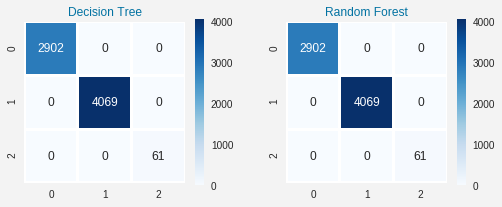

In [144]:
import itertools
name_model = ['Decision Tree','Random Forest']
models = [dec_clf,random_clf]
length = len(models)

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(models,range(length),name_model) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(xtest)
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(predictions,ytest)
    sn.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels='auto',
                yticklabels='auto',
                linewidths = 2,linecolor = "w",cmap = "Blues")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

print("0 - Full-Year Resident", "\n1 - Full Year Non-resident", "\n2 - Part-Year Non-resident\n")

# Conclusion: 
The main moto to do this kind of study is to see how the features is effects the dataset. By using the most effective features and get the highest accuracy and is more valuabable then getting the highest accuracy or recall by using all the variables.